# Lecture 3 Homework
## Bernardo Gutierrez

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method. 

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.

In [1]:
#this is the recursive method function
def fib2(n):
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [87]:
#this is the memorization method function
def fib3(n, table):
    if n == 0 or n==1:
        table[n]=n
    
    if table[n] is None:
        table[n] = fib3(n-1,table)+fib3(n-2,table)
        
    return table[n]

In [88]:
#this is the tabulation method function
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
       
    for i in range(2,n+1):
        table[i]= table[i-1]+table[i-2]
        
    return table[n]

In [229]:
#this is the matrix method code
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f

1) Calculate and plot the ratio F(n)/F(n-1) with respect to n using memorization method. 

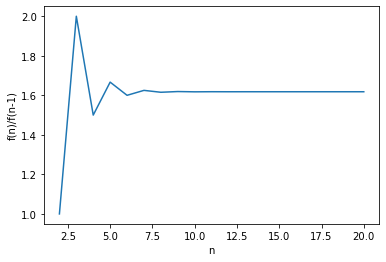

In [264]:
import numpy as np
import matplotlib.pyplot as plt

n=20
table = [None]*(n+1)

fib3(n,table)
#using the memorization method i can write to a table an then call it to calculate F(n)/F(n-1)

goldrat=[] #this is an empty list that I write to with the forloop
for i in range(2,n+1):
    ratio=table[i]/table[i-1] #each iteration I calculate the ratio and then append to the empty list
    goldrat=np.append(goldrat,ratio)

plt.plot(np.arange(2,n+1),goldrat)
plt.xlabel('n')
plt.ylabel('f(n)/f(n-1)')
plt.show()

2) 

    a) Use the Recursion method, Tabulation method,  and matrix method to calculate the time spent for different n (e.g. 1, 10, 100, 1000, 10000, … uniform in the log space). (caution: recursion method will break when n>100)

    b) For each method, output the time and n into a file
       
    c) Read from the file and plot log(time) (y-axis) vs. log(n) (x-axis) for different methods. 
       
    d) Discuss the complexity of each method.

In [97]:
n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size): #this loop calculates fibonacci numbers and writes the index and time to n2 and time2
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time #must call time before and after the function
    print(n2[i],time2[i])


1 0.0
4 0.0
7 0.0
10 0.0
13 0.0
16 0.0020105838775634766
19 0.006000041961669922
22 0.02399754524230957
25 0.10003495216369629
28 0.42609620094299316
31 1.764397144317627
34 7.476676940917969
37 31.493104219436646
40 135.01619052886963


In [255]:
import pandas as pd #pandas let's me export the n2 and timem2 arrays to a csv
data = {'n':n2,'time':time2}
df= pd.DataFrame(data,columns=['n','time'])
df.to_csv('recursive.csv')

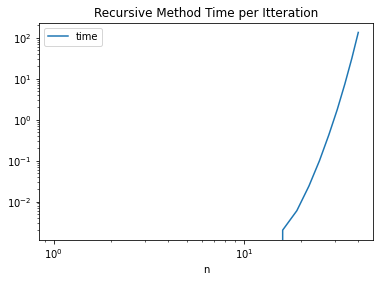

In [272]:
df = pd.read_csv('recursive.csv')
df.plot(x ='n', y='time', kind = 'line',loglog=True)
plt.title('Recursive Method Time per Itteration')
plt.show()

In [267]:
#this code is similar to the recursive method code 
n4=np.arange(6500,205000,5000) #start position is changed  sinse smaller values result in t=0
time4=np.zeros(n4.size)

for i in range(n4.size):
    table3=[None]*(i*5000+6500)
    start_time = time.time()
    temp=fib4(i*5000+6500)
    time4[i] = time.time()-start_time
    print(n4[i],time4[i])

6500 0.00802302360534668
11500 0.03601360321044922
16500 0.056009769439697266
21500 0.10004353523254395
26500 0.156219482421875
31500 0.18003320693969727
36500 0.25209808349609375
41500 0.3169846534729004
46500 0.35478758811950684
51500 0.42558908462524414
56500 0.4741833209991455
61500 0.544339656829834
66500 0.6282505989074707
71500 0.7001364231109619
76500 0.797762393951416
81500 0.8354315757751465
86500 0.9100978374481201
91500 0.9374916553497314
96500 0.750788688659668
101500 0.7109887599945068
106500 0.7821013927459717
111500 0.8572461605072021
116500 0.8992033004760742
121500 1.0018353462219238
126500 1.0698225498199463
131500 1.1730988025665283
136500 1.20884370803833
141500 1.2728099822998047
146500 1.4221017360687256
151500 1.621352195739746
156500 1.7117743492126465
161500 1.877120018005371
166500 1.9376208782196045
171500 1.9760410785675049
176500 2.157679557800293
181500 1.8891823291778564
186500 1.1208453178405762
191500 2.7882959842681885
196500 4.485198259353638
201500 

In [268]:
import pandas as pd
data = {'n':n4,'time':time4}
df= pd.DataFrame(data,columns=['n','time'])
df.to_csv('tabulation_method.csv')

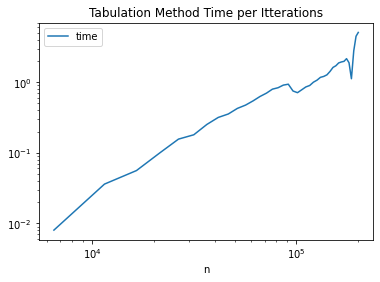

In [270]:
df = pd.read_csv('tabulation_method.csv')
df.plot(x ='n', y='time', kind = 'line',loglog=True)
plt.title('Tabulation Method Time per Itterations')
plt.show()

In [276]:
#this code is for the matrix method
n5=np.arange(100000,510000,5000)
time5=np.zeros(n5.size)

for i in range(n5.size):
    table3=[None]*(i*5000+100000)
    start_time = time.time()
    temp=fib5(i*5000+100000)
    time5[i] = time.time()-start_time
    print(n5[i],time5[i])

100000 0.012002706527709961
105000 0.008002281188964844
110000 0.00800180435180664
115000 0.00800013542175293
120000 0.012004852294921875
125000 0.012021064758300781
130000 0.016004323959350586
135000 0.016004085540771484
140000 0.016194581985473633
145000 0.016004085540771484
150000 0.012002944946289062
155000 0.012002944946289062
160000 0.020000934600830078
165000 0.01974010467529297
170000 0.020004749298095703
175000 0.023998498916625977
180000 0.02001357078552246
185000 0.020005226135253906
190000 0.019997119903564453
195000 0.02799057960510254
200000 0.036026716232299805
205000 0.03600955009460449
210000 0.036009788513183594
215000 0.03600931167602539
220000 0.03600955009460449
225000 0.0400090217590332
230000 0.0360112190246582
235000 0.03600931167602539
240000 0.035996437072753906
245000 0.04402470588684082
250000 0.04401087760925293
255000 0.0479884147644043
260000 0.04801201820373535
265000 0.048001766204833984
270000 0.05203080177307129
275000 0.060004472732543945
280000 0.05

In [277]:
import pandas as pd
data = {'n':n5,'time':time5}
df= pd.DataFrame(data,columns=['n','time'])
df.to_csv('matrix_method.csv')

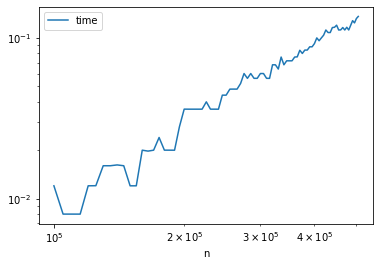

In [278]:
df = pd.read_csv('matrix_method.csv')
df.plot(x ='n', y='time', kind = 'line',loglog=True)
plt.show()

The recursive method is clearly more complex than the other two methods and from the curvature it seems to have an exponetinal complexity. The tabulation method looks seemingly straight so it could be linear or it could be nlogn. The matrix method is by far the least complex and it should be logn